<a href="https://colab.research.google.com/github/juanpradam12/JuanPrada_Ejercicio28/blob/master/Dengue_and_Bakery_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dengue Data Analysis



The data contains features relating dengue

In [0]:
# Pandas to manage the data
import pandas as pd
# NumPy necessary for scientific computing
import numpy as np 
# Linear algebra library
import numpy.linalg as la
# plt tool for data visualization
import matplotlib.pyplot as plt
# sklearn methods to have data insights
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [0]:
# I want to synchronize it with the data at my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Loading the data and having a first view of it (first 5 lines)
dengue = pd.read_csv('/content/drive/My Drive/Linux Juanda/MetodosComputacionalesAvanzados/UnsupervisedLearning/dengue.csv')
dengue.head()

,Unnamed: 0,humid,humid90,temp,temp90,h10pix,h10pix90,trees,trees90,NoYes,Xmin,Xmax,Ymin,Ymax
0,1,0.671389,4.416667,2.037500,8.470835,17.356529,17.808611,0.0,1.5,0,70.5,74.5,38.0,35.5
1,2,7.648334,8.167500,12.325000,14.925000,10.983610,11.691670,0.0,1.0,0,62.5,64.5,35.5,34.5
2,3,6.979056,9.563058,6.925000,14.591660,17.508329,17.625280,0.0,1.2,0,68.5,69.5,36.0,35.0
3,4,1.110416,1.825361,4.641665,6.046669,17.417635,17.516939,0.0,0.6,0,67.0,68.0,35.0,34.0
4,5,9.027055,9.742751,18.175000,19.710000,13.843060,13.843060,0.0,0.0,0,61.0,64.5,33.5,32.0


KMEANS

In order to gain some inference on the data we will use the clustering method 

In [0]:
# We select six features which we would like to study
x_features = ['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']
# and remove the values of na on each row
dengue = dengue.dropna()

In [0]:
# In order to work better with the data set, I normalize it 
dengue[x_features] = (dengue[x_features] - dengue[x_features].mean())/dengue[x_features].std()

In [0]:
# train the method
mms = MinMaxScaler()
mms.fit(dengue)
dengue_transformed = mms.transform(dengue)

In [0]:
# try it for different values of K (elbow method)
squared_distances = []
ks = range(1,20)
for k in ks:
    km = KMeans(n_clusters = k)
    km = km.fit(dengue_transformed)
    squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method For Optimal K')

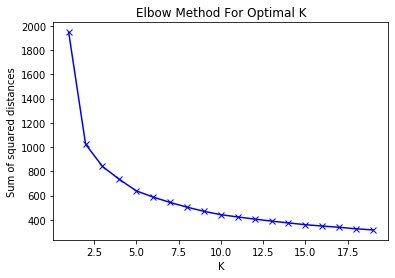

In [0]:
plt.plot(ks,squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal K')

The point where the curvature varies the most is the optimal K (2 or 5)

Silhouette Score

In order to have a greater insight we will use a method which is more reliable

In [0]:
from __future__ import print_function
# Other methods from sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
# Data visualization
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.40811225183136657
For n_clusters = 3 The average silhouette_score is : 0.32834302287509615
For n_clusters = 4 The average silhouette_score is : 0.3174165285263138
For n_clusters = 5 The average silhouette_score is : 0.3087757605795924
For n_clusters = 6 The average silhouette_score is : 0.3083111018275405
For n_clusters = 7 The average silhouette_score is : 0.2928638412525304
For n_clusters = 8 The average silhouette_score is : 0.29807276463860505
For n_clusters = 9 The average silhouette_score is : 0.3063480913409278
For n_clusters = 10 The average silhouette_score is : 0.3079780633013072
For n_clusters = 11 The average silhouette_score is : 0.3080263952329992
For n_clusters = 12 The average silhouette_score is : 0.31384125405888225
For n_clusters = 13 The average silhouette_score is : 0.32365356878434315
For n_clusters = 14 The average silhouette_score is : 0.32405092891310566
For n_clusters = 15 The average silhouette_score is :

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


For n_clusters = 22 The average silhouette_score is : 0.31027673647057363


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


For n_clusters = 23 The average silhouette_score is : 0.3095219578422632


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


For n_clusters = 24 The average silhouette_score is : 0.30951132460263203


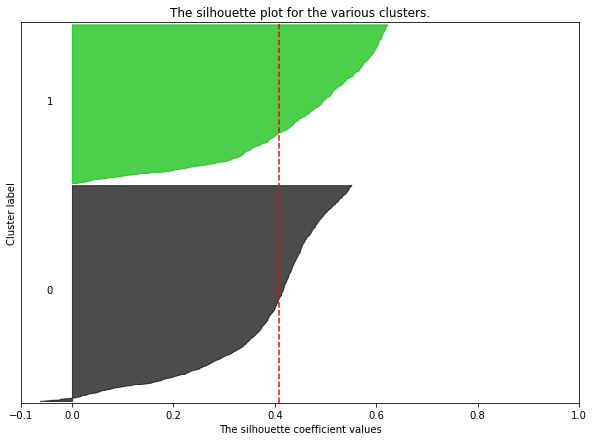

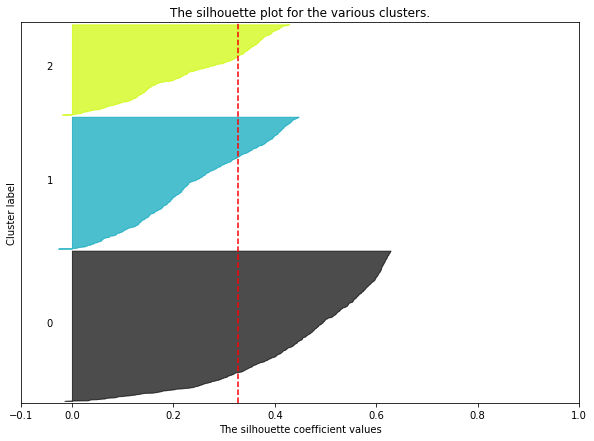

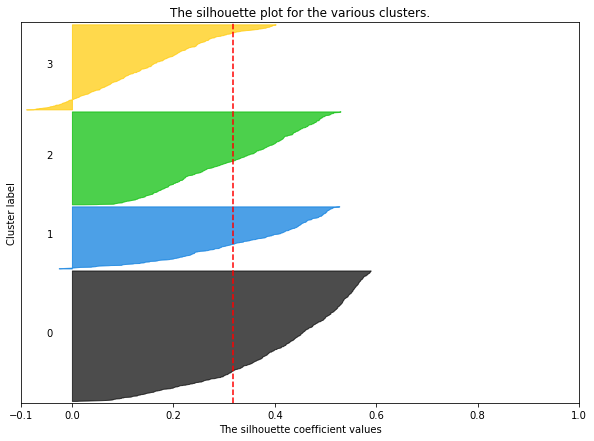

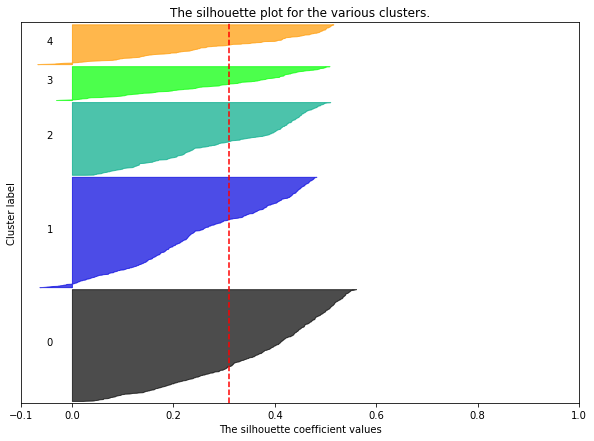

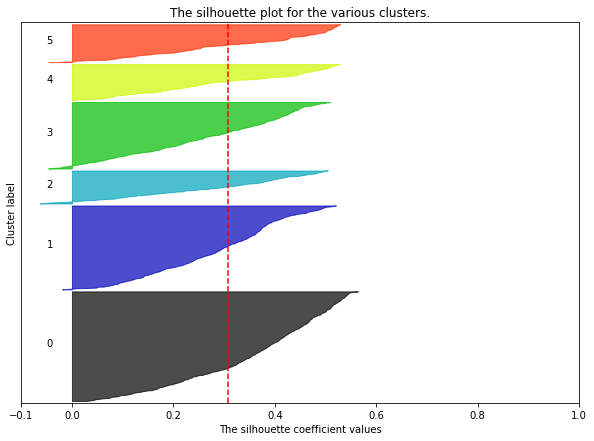

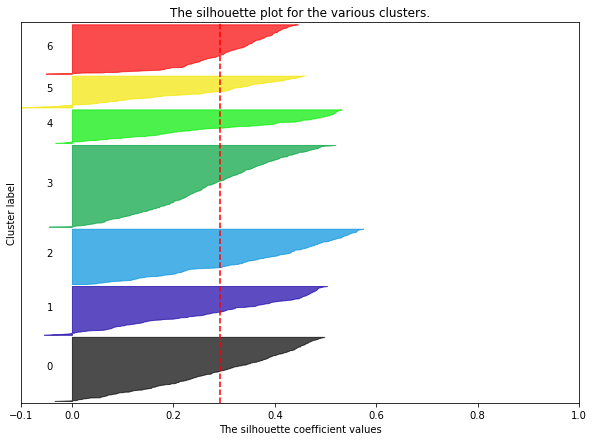

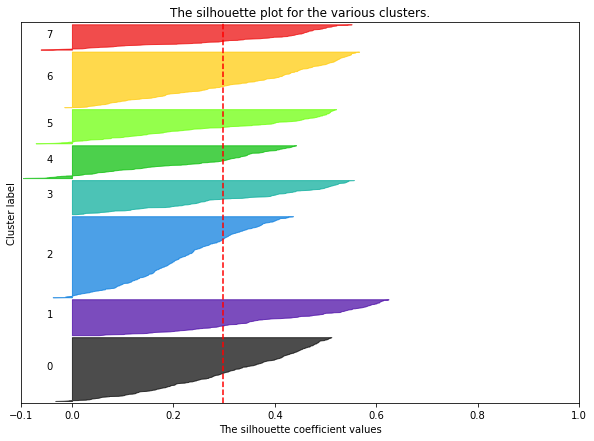

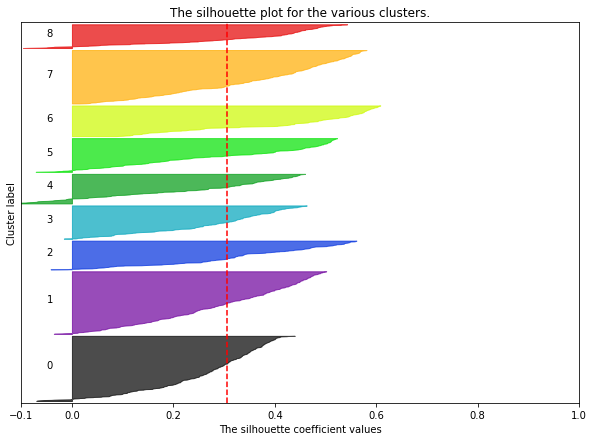

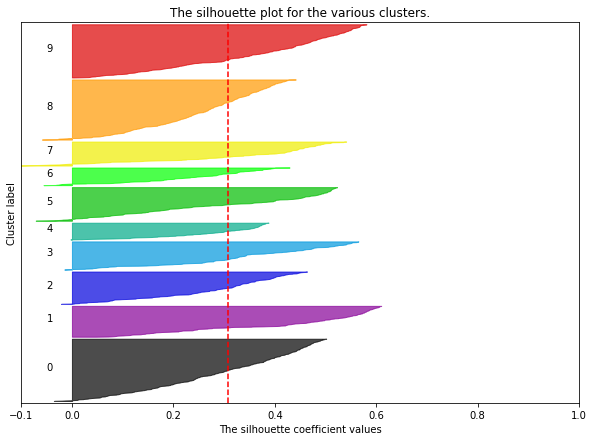

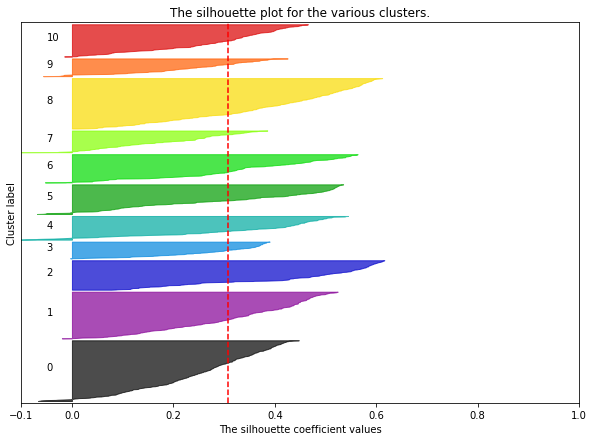

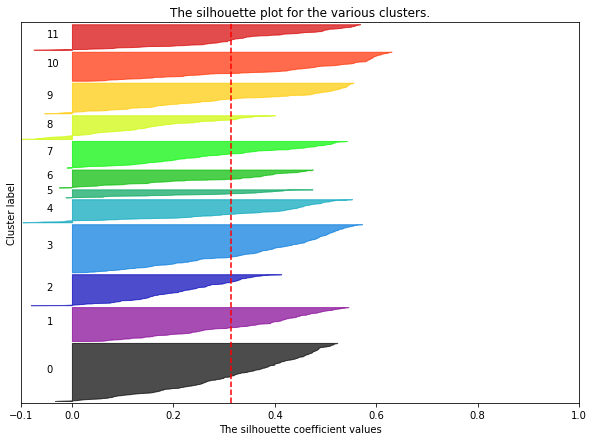

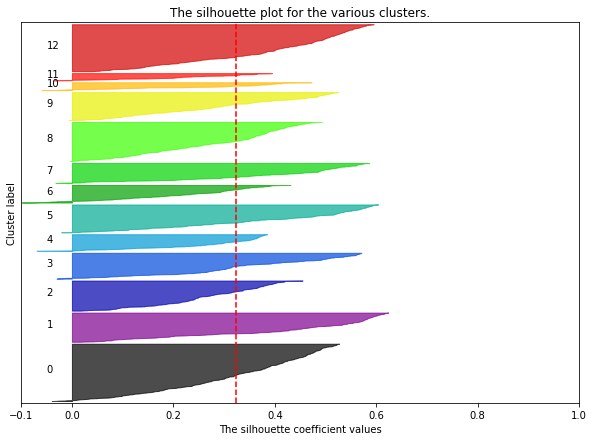

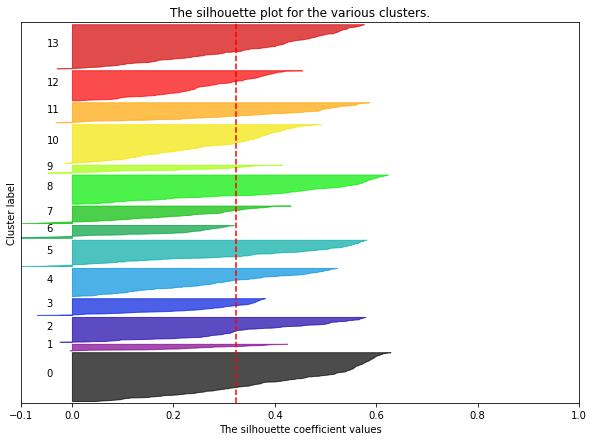

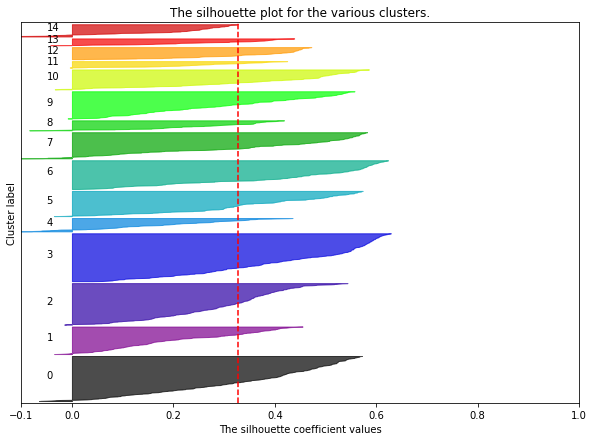

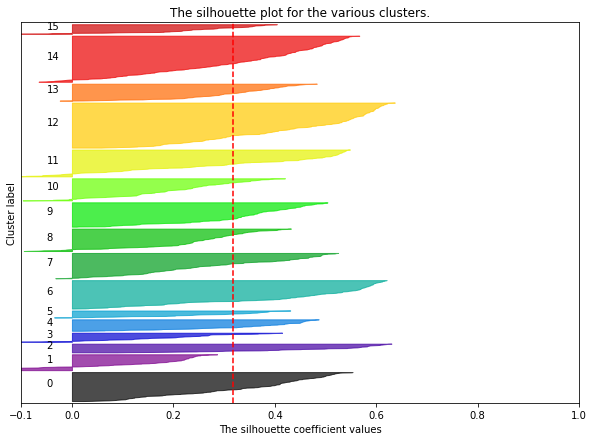

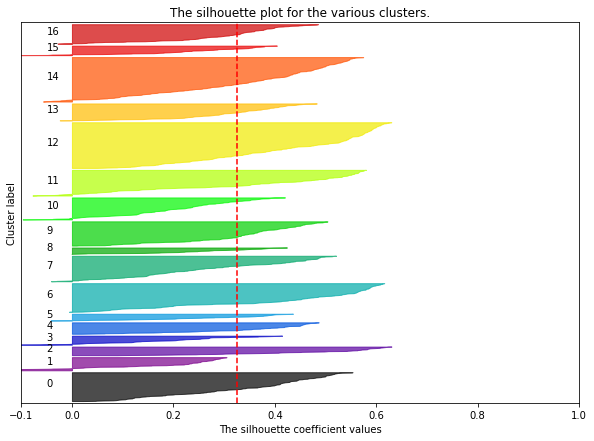

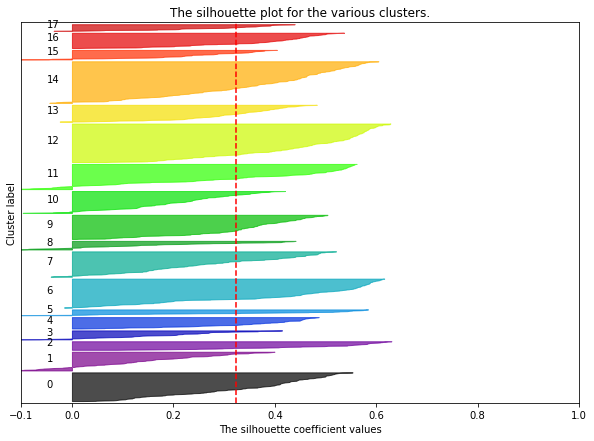

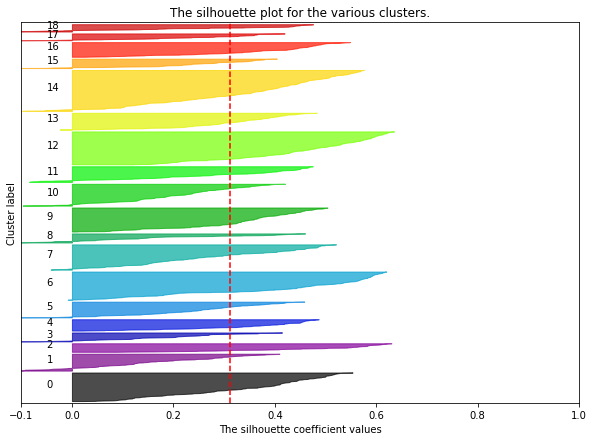

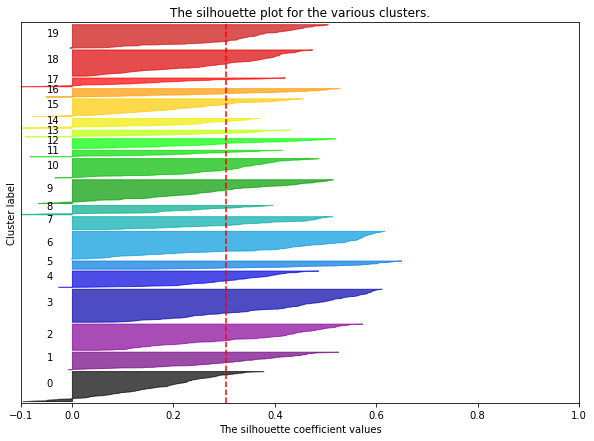

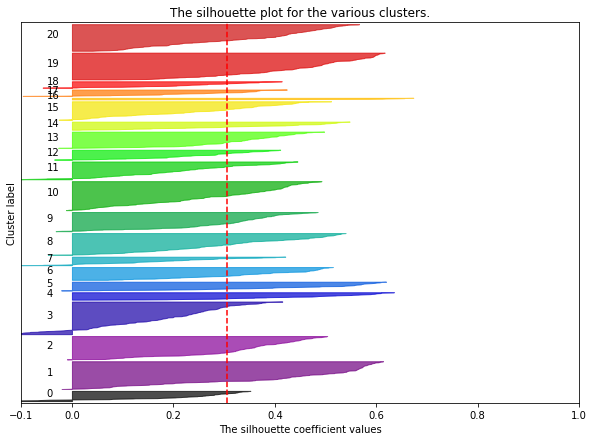

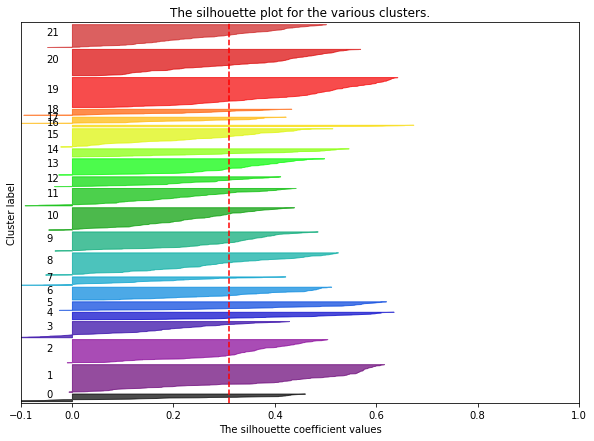

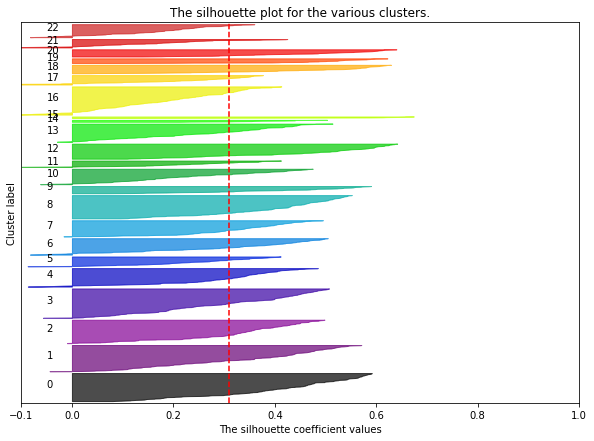

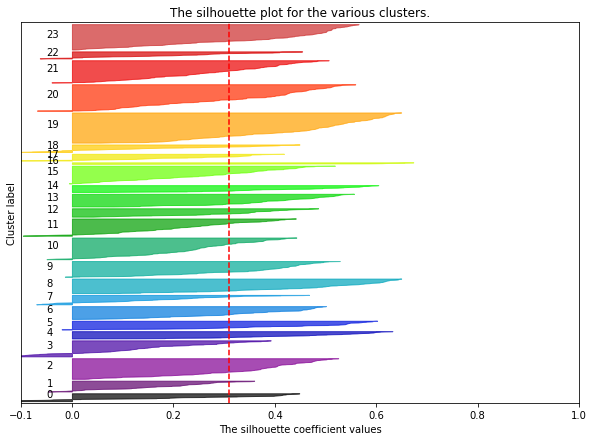

In [0]:
range_n_clusters = np.arange(2,25)
X = dengue[x_features]
score = []
for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Text(0, 0.5, 'silhouette score')

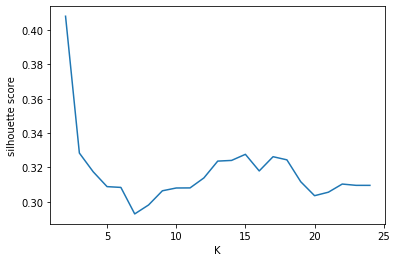

In [0]:
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')

According to the later graph it is clear that the optimal number of clusters is K=14

In [0]:
# now we train the method with k=14
cluster19 = KMeans(n_clusters=19, random_state=10)
cluster_labels = cluster19.fit_predict(X)

Bakery Data Analysis

Data contains date, time, transacion number and items

In [0]:
# Loading the data and having a first view of it (first 5 lines)
data = pd.read_csv('/content/drive/My Drive/Linux Juanda/MetodosComputacionalesAvanzados/UnsupervisedLearning/BreadBasket_DMS.csv')
data_clean = pd.DataFrame(data[:-1])
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [0]:
# organize them according to several items
dummies = pd.get_dummies(data['Item'], prefix='Item')
data = pd.concat([data, dummies], axis=1)
data = data.drop('Item', axis=1)

# Make groups according to each purchase
data = data.groupby(['Date','Time','Transaction']).sum()
data.reset_index(inplace = True)

In [0]:
# lets have a view of the data 
data.head()

,Date,Time,Transaction,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,...,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge
0,2016-10-30,09:58:11,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-10-30,10:07:57,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-10-30,10:08:41,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:13:03,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We will use principal component analysis in order to see which items are the ones that represent the data the most

In [0]:
# Covariance Matrix
cov_matrix = np.array(data[x_features].cov())
# eigenvalues and eigenvectors
val, vec = la.eig(cov_matrix)

In [0]:
# vectors associated to the new space spaned by the most relevant components
vec1 = vec[:,0]
vec2 = -vec[:,1]

In [0]:
# Varianza
var = np.sum(data[x_features].var())

In [0]:
# Varianz for each component
def var_comp(vec,data,comp):
    return np.sum(data.dot(vec[:,comp])**2)/len(data)

In [0]:
var_comps = []
x_features = np.array(x_features)
for i in range(len(x_features)):
    var_comps.append(var_comp(vec,data[x_features],i)/var)

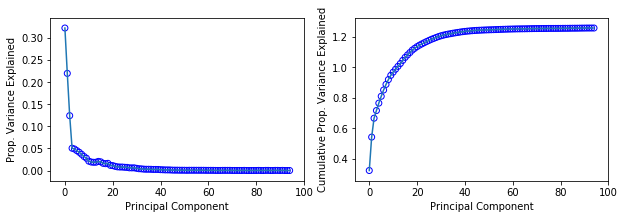

In [0]:
fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
x = np.arange(len(x_features))
plt.plot(x,var_comps)
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.scatter(x,var_comps,facecolors="none",edgecolors='blue')


plt.subplot(1,2,2)
cum_var = np.cumsum(np.array(var_comps))
plt.plot(x,cum_var)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.scatter(x,cum_var,facecolors="none",edgecolors='blue')

In [0]:
# projection of vector b over vector a  
def proy(a,b):
    return np.dot(a,b)/np.sqrt(np.dot(a,a))

In [0]:

# New space of coordiantes 
new_c = []
labels = []
for index, rows in data.iterrows():
    fila = rows[x_features].values
    new_c.append([proy(vec1,fila),proy(vec2,fila)]) 

Text(0, 0.5, 'Second Principal Component')

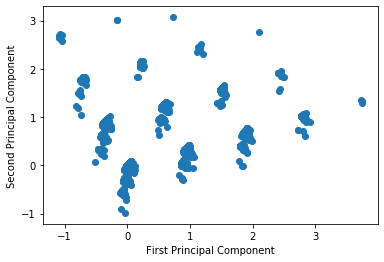

In [0]:
# Plot in the space generated by the first two components
new_c=np.array(new_c)
plt.scatter(new_c[:,0],new_c[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

According to the graph above it make sense to cluster with k=16. So it has sense to preform KMeans for that number


In [0]:
# Model for K=16
cluster16 = KMeans(n_clusters=16, random_state=10)
cluster_labels = cluster16.fit_predict(data[x_features])
data['clusters'] = cluster_labels

In [0]:
data[data.clusters==1].sum()

Date                             2016-10-302016-10-302016-10-302016-10-302016-1...
Time                             09:58:1110:20:5110:21:5910:27:2110:32:4610:43:...
Transaction                                                                8759241
Item_Adjustment                                                                  0
Item_Afternoon with the baker                                                    1
                                                       ...                        
Item_Valentine's card                                                            0
Item_Vegan Feast                                                                 0
Item_Vegan mincepie                                                              7
Item_Victorian Sponge                                                            1
clusters                                                                      1841
Length: 99, dtype: object

In [0]:
k = 1
values = data[data.clusters==k].sum().values[3:98]
itemss = data[data.clusters==k].columns[3:98]

<BarContainer object of 95 artists>

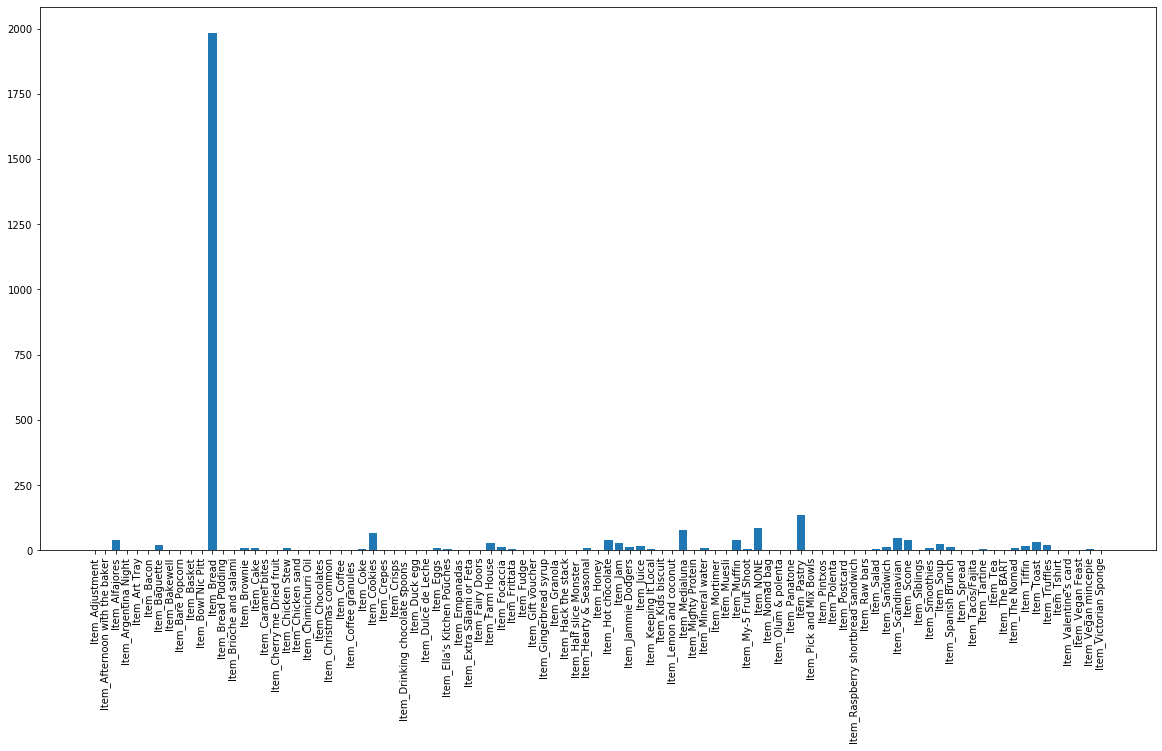

In [0]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(itemss,values)

Each cluster represents an occassion

Now preform silhouette method to see the optimal number of klusters

In [0]:
range_n_clusters = np.arange(80,100)
X = data[x_features]
score = []
for n_clusters in range_n_clusters:
    
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 80 The average silhouette_score is : 0.3943041648581635
For n_clusters = 81 The average silhouette_score is : 0.39525997393379936
For n_clusters = 82 The average silhouette_score is : 0.3961176397238415
For n_clusters = 83 The average silhouette_score is : 0.3962589138554177
For n_clusters = 84 The average silhouette_score is : 0.39560258960271877
For n_clusters = 85 The average silhouette_score is : 0.3968536754698474
For n_clusters = 86 The average silhouette_score is : 0.39792498607010346
For n_clusters = 87 The average silhouette_score is : 0.39931683367891907
For n_clusters = 88 The average silhouette_score is : 0.39978785499070346
For n_clusters = 89 The average silhouette_score is : 0.40129628800969197
For n_clusters = 90 The average silhouette_score is : 0.40215345672768904
For n_clusters = 91 The average silhouette_score is : 0.4037041288030174
For n_clusters = 92 The average silhouette_score is : 0.4082469168397803
For n_clusters = 93 The average silhouette_s

Text(0, 0.5, 'silhouette score')

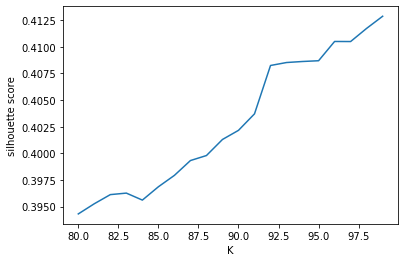

In [0]:
# score graph for silhouette method
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')

The optimal number of clusters is K=97. And preform kmeans for that number of clusters

In [0]:
cluster97 = KMeans(n_clusters=97, random_state=10)
cluster_labels = cluster97.fit_predict(data[x_features])
data['clusters'] = cluster_labels

In [0]:
# Cluster Number
i=1

In [0]:
val = data[data.clusters==i].sum().values[3:98]
items = data[data.clusters==i].columns[3:98]

<BarContainer object of 95 artists>

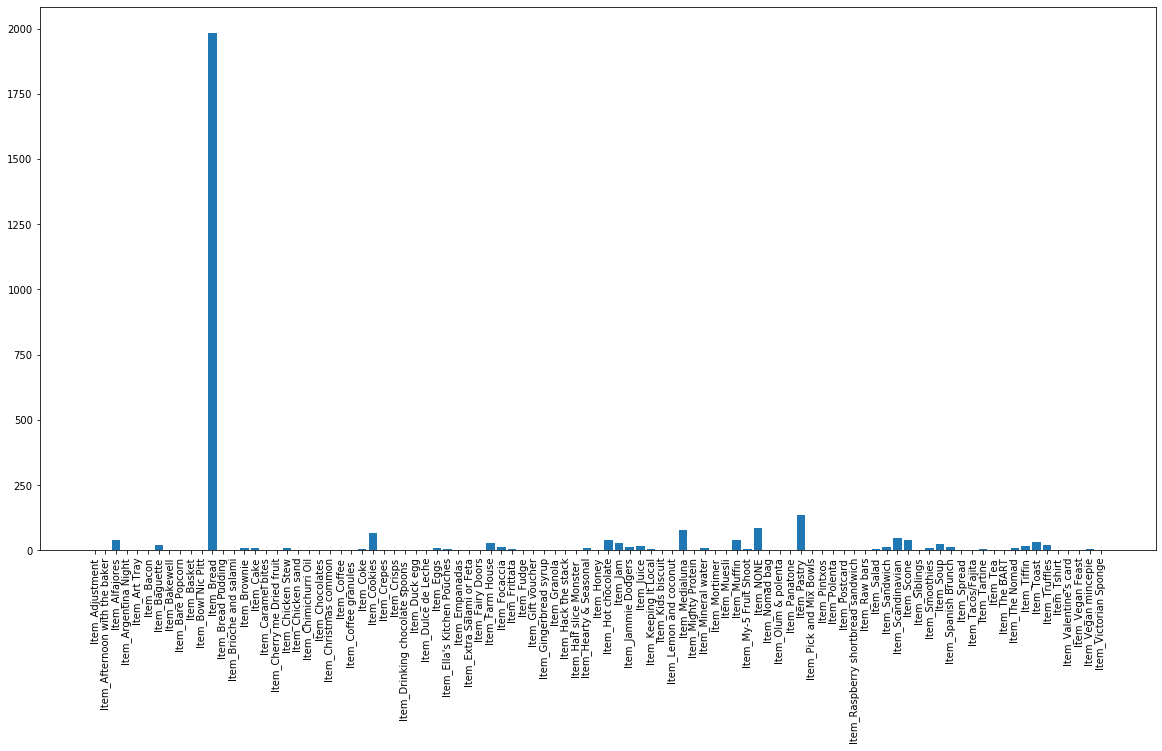

In [0]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(items,val)

Each cluster represents what the people purchase in each occasion. For example, for cluster K=1 above wee se that oftenly individuals buy bread with cookies or pastry